In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

After the essential libraries are imported, we will use a new cell to load the Dataset.

In [2]:
data1 = pd.read_csv("heart.csv")
data1 = pd.DataFrame(data1)

Before proceeding, we will get a basic understanding of our data by using the following command.

In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Now, we want to understand the number of records and the number of features. This can be achieved by using the following code snippet,

In [4]:
#number of records and features in the dataset
data1.shape

(303, 14)

The 303 in the output defines the number of records in the dataset and 14 defines the number of features in the dataset including the ‘target variable’.

Data Cleaning/ Data preprocessing
Before providing data to a model, it is essential to clean the data and treat the nulls, outliers, duplicate data records.

We will begin with checking for duplicate rows with the code snippet,

In [5]:
#Check duplicate rows in data
duplicate_rows = data1[data1.duplicated()]
print("Number of duplicate rows :: ", duplicate_rows.shape)

Number of duplicate rows ::  (1, 14)


The data contains 1 duplicate row. We will remove the duplicate row and check for duplicates again.



In [6]:
#we have one duplicate row.
#Removing the duplicate row
data1 = data1.drop_duplicates()
duplicate_rows = data1[data1.duplicated()]
print("Number of duplicate rows :: ", duplicate_rows.shape)
#Number of duplicate rows after dropping one duplicate row

Number of duplicate rows ::  (0, 14)


Now, there are 0 duplicate rows in the data. We will check for ‘null’ values in the data.

In [7]:
#Looking for null values
print("Null values :: ")
print(data1.isnull() .sum())

Null values :: 
age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [8]:
#Check if the other data is consistent
data1.shape

(302, 14)

As there are no ‘null’ values in data, we will go ahead with ‘Outlier Detection‘ using box plots.

We will plot box plots for all features.

<AxesSubplot:xlabel='thall'>

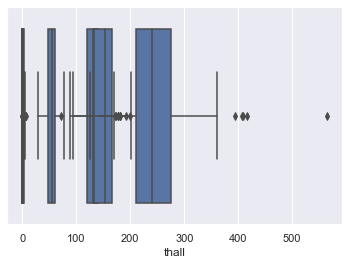

In [9]:
#As there are no null values in data, we can proceed with the next steps.
#Detecting Outliers
# 1. Detecting Outliers using IQR (InterQuartile Range)
sns.boxplot(x=data1['age'])
#No Outliers observed in 'age'
sns.boxplot(x=data1['sex'])
#No outliers observed in sex data
sns.boxplot(x=data1['cp'])
#No outliers in 'cp'
sns.boxplot(x=data1['trtbps'])
#Some outliers are observed in 'trtbps'. They will be removed later
sns.boxplot(x=data1['chol'])
#Some outliers are observed in 'chol'. They will be removed later
sns.boxplot(x=data1['fbs'])
sns.boxplot(x=data1['restecg'])
sns.boxplot(x=data1['thalachh'])
#Outliers present in thalachh
sns.boxplot(x=data1['exng'])
sns.boxplot(x=data1['oldpeak'])
#Outliers are present in 'OldPeak'
sns.boxplot(x=data1['slp'])
sns.boxplot(x=data1['caa'])
#Outliers are present in 'caa'
sns.boxplot(x=data1['thall'])

From the box plots, outliers are present in trtbps, chol, thalachh, oldpeak, caa, thall.

The Outliers are removed using two methods,

1. Inter-Quartile Range and

2. Z-score

We will use both methods and check the effect on the dataset.

1. Inter-Quartile Range
In IQR, the data points higher than the upper limit and lower than the lower limit are considered outliers.

upper limit = Q3 + 1.5 * IQR
lower limit = Q1 – 1.5 * IQR
We find the IQR for all features using the code snippet,

In [10]:
#Find the InterQuartile Range
Q1 = data1.quantile(0.25)
Q3 = data1.quantile(0.75)
IQR = Q3-Q1
print('*********** InterQuartile Range ***********')
print(IQR)
# Remove the outliers using IQR
data2 = data1[~((data1<(Q1-1.5*IQR))|(data1>(Q3+1.5*IQR))).any(axis=1)]
data2.shape

*********** InterQuartile Range ***********
age         13.00
sex          1.00
cp           2.00
trtbps      20.00
chol        63.75
fbs          0.00
restecg      1.00
thalachh    32.75
exng         1.00
oldpeak      1.60
slp          1.00
caa          1.00
thall        1.00
output       1.00
dtype: float64


(228, 14)

After removing outliers using IQR, the data contains 228 records.

2. Z – Score
If a Z-score is greater than 3, it implies that the data point differs from the other data points and hence is treated as an outlier.

In [11]:
#Removing outliers using Z-score
z = np.abs(stats.zscore(data1))
data3 = data1[(z<3).all(axis=1)]
data3.shape

(287, 14)

After using Z-score to detect and remove outliers, the number of records in the dataset is 287. 

As the number of records available is higher after Z-score, we will proceed with ‘data3’

Correlation
After removing outliers from data, we will find the correlation between all the features.

Two types of correlation will be used here.

Pearson Correlation
Spearman Correlation
 

1. Pearson Correlation

Text(0.5, 1.0, 'Pearson Correlation')

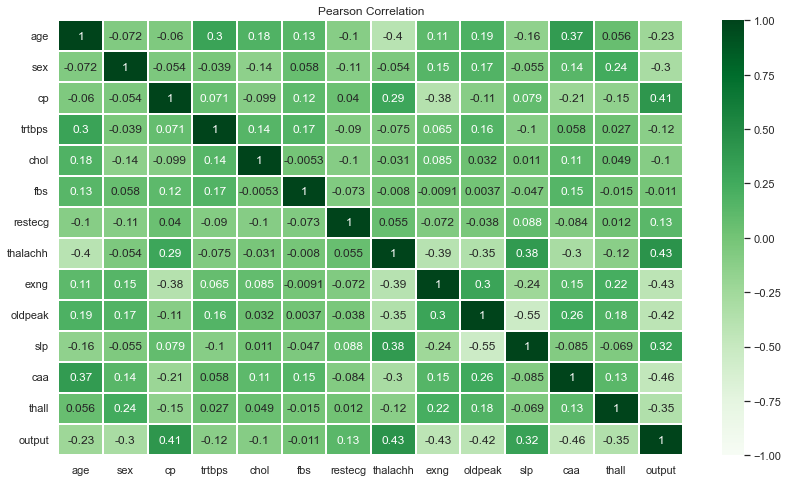

In [12]:
#Finding the correlation between variables
pearsonCorr = data3.corr(method='pearson')
spearmanCorr = data3.corr(method='spearman')
fig = plt.subplots(figsize=(14,8))
sns.heatmap(pearsonCorr, vmin=-1,vmax=1, cmap = "Greens", annot=True, linewidth=0.1)
plt.title("Pearson Correlation")

From the heat map, the same values of correlation are repeated twice. To remove this, we will mask the upper half of the heat map and show only the lower half. 

Text(0.5, 1.0, 'Pearson Correlation')

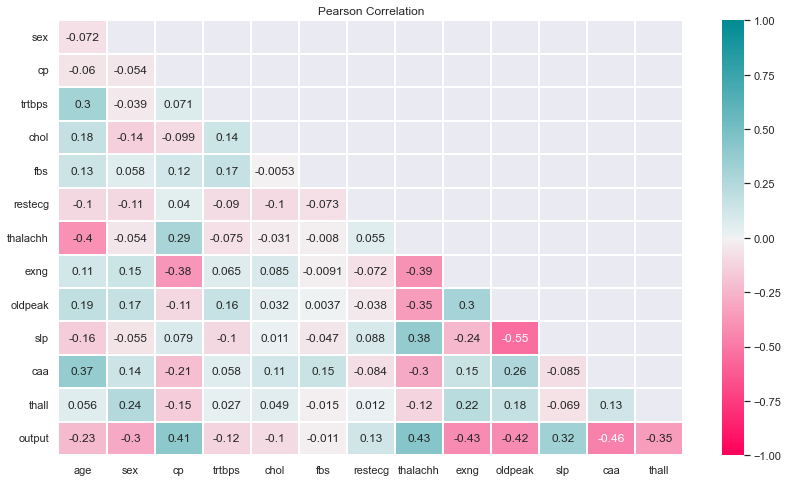

In [13]:
#Create mask for both correlation matrices
#Pearson corr masking
#Generating mask for upper triangle
maskP = np.triu(np.ones_like(pearsonCorr,dtype=bool))
#Adjust mask and correlation
maskP = maskP[1:,:-1]
pCorr = pearsonCorr.iloc[1:,:-1].copy()
#Setting up a diverging palette
cmap = sns.diverging_palette(0, 200, 150, 50, as_cmap=True)
fig = plt.subplots(figsize=(14,8))
sns.heatmap(pCorr, vmin=-1,vmax=1, cmap = cmap, annot=True, linewidth=0.3, mask=maskP)
plt.title("Pearson Correlation")

2. Spearman Correlation

Text(0.5, 1.0, 'Spearman Correlation')

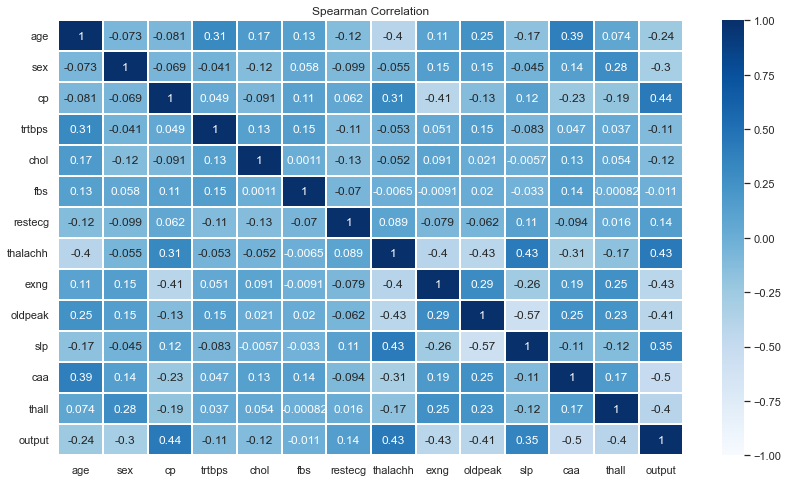

In [14]:
fig = plt.subplots(figsize=(14,8))
sns.heatmap(spearmanCorr, vmin=-1,vmax=1, cmap = "Blues", annot=True, linewidth=0.1)
plt.title("Spearman Correlation")

From both the heat maps, the features fbps, chol and trtbps have the lowest correlation with output. 

# Classification


Before implementing any classification algorithm, we will divide our dataset into training data and test data. I have used 70% of the data for training and the remaining 30% will be used for testing

In [16]:
#From this we observe that the minimum correlation between output and other features in
#fbs,trtbps and chol
x = data3.drop("output", axis=1)
y = data3["output"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

We will implement four classification algorithms,

1. Logistic Regression Classifier

2. Decision Trees Classifier

3. Random Forest Classifier

4. K Nearest Neighbours Classifier

# 1. Logistic Regression Classifier

The code snippet used to build Logistic Regression Classifier is,

In [17]:
#Building classification models
names = ['Age', 'Sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']
#   ****************Logistic Regression*****************
logReg = LogisticRegression(random_state=0, solver='liblinear')
logReg.fit(x_train, y_train)
#Check accuracy of Logistic Regression
y_pred_logReg = logReg.predict(x_test)
#Model Accuracy
print("Accuracy of logistic regression classifier :: " ,metrics.accuracy_score(y_test,y_pred_logReg))
#Removing the features with low correlation and checking effect on accuracy of model
x_train1 = x_train.drop("fbs",axis=1)
x_train1 = x_train1.drop("trtbps", axis=1)
x_train1 = x_train1.drop("chol", axis=1)
x_train1 = x_train1.drop("restecg", axis=1)
x_test1 = x_test.drop("fbs", axis=1)
x_test1 = x_test1.drop("trtbps", axis=1)
x_test1 = x_test1.drop("chol", axis=1)
x_test1 = x_test1.drop("restecg", axis=1)
logReg1 = LogisticRegression(random_state=0, solver='liblinear').fit(x_train1,y_train)
y_pred_logReg1 = logReg1.predict(x_test1)
print("nAccuracy of logistic regression classifier after removing features:: " ,metrics.accuracy_score(y_test,y_pred_logReg1))

Accuracy of logistic regression classifier ::  0.8390804597701149
nAccuracy of logistic regression classifier after removing features::  0.8275862068965517


The accuracy of logistic regression classifier using all features is 83.90%

While the accuracy of logistic regression classifier after removing features with low correlation is 82.75%

# 2. Decision Tree Classifier

The code snippet used to build a decision tree is,

In [18]:
# ***********************Decision Tree Classification***********************
decTree = DecisionTreeClassifier(max_depth=6, random_state=0)
decTree.fit(x_train,y_train)
y_pred_decTree = decTree.predict(x_test)
print("Accuracy of Decision Trees :: " , metrics.accuracy_score(y_test,y_pred_decTree))
#Remove features which have low correlation with output (fbs, trtbps, chol)
x_train_dt = x_train.drop("fbs",axis=1)
x_train_dt = x_train_dt.drop("trtbps", axis=1)
x_train_dt = x_train_dt.drop("chol", axis=1)
x_train_dt = x_train_dt.drop("age", axis=1)
x_train_dt = x_train_dt.drop("sex", axis=1)
x_test_dt = x_test.drop("fbs", axis=1)
x_test_dt = x_test_dt.drop("trtbps", axis=1)
x_test_dt = x_test_dt.drop("chol", axis=1)
x_test_dt = x_test_dt.drop("age", axis=1)
x_test_dt = x_test_dt.drop("sex", axis=1)
decTree1 = DecisionTreeClassifier(max_depth=6, random_state=0)
decTree1.fit(x_train_dt, y_train)
y_pred_dt1 = decTree1.predict(x_test_dt)
print("Accuracy of decision Tree after removing features:: ", metrics.accuracy_score(y_test,y_pred_dt1))


Accuracy of Decision Trees ::  0.7816091954022989
Accuracy of decision Tree after removing features::  0.8160919540229885


The accuracy of the decision tree with all features is 78.16% while accuracy after removing low correlation features is 81.60%

# 3. Random Forest Classifier

Implement a random forest classifier using the code,

In [19]:
# Using Random forest classifier
rf = RandomForestClassifier(n_estimators=500)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
print("Accuracy of Random Forest Classifier :: ", metrics.accuracy_score(y_test, y_pred_rf))
#Find the score of each feature in model and drop the features with low scores
f_imp = rf.feature_importances_
for i,v in enumerate(f_imp):
    print('Feature: %s, Score: %.5f' % (names[i],v))

Accuracy of Random Forest Classifier ::  0.8275862068965517
Feature: Age, Score: 0.08917
Feature: Sex, Score: 0.03772
Feature: cp, Score: 0.10836
Feature: trtbps, Score: 0.06970
Feature: chol, Score: 0.09085
Feature: fbs, Score: 0.01208
Feature: restecg, Score: 0.02075
Feature: thalachh, Score: 0.12815
Feature: exng, Score: 0.05490
Feature: oldpeak, Score: 0.12709
Feature: slp, Score: 0.03793
Feature: caa, Score: 0.13288
Feature: thall, Score: 0.09041


The accuracy of the model is 82.75%. Along with accuracy, we will also print the feature and its importance in the model. Then, we will eliminate features with low importance and create another classifier and check the effect on the accuracy of the model. As all the features have some contribution to the model, we will keep all the features.

# 4. K Nearest Neighbours Classifier

Implement K nearest neighbor classifier and print the accuracy of the model.

In [20]:
#K Neighbours Classifier
knc =  KNeighborsClassifier()
knc.fit(x_train,y_train)
y_pred_knc = knc.predict(x_test)
print("Accuracy of K-Neighbours classifier :: ", metrics.accuracy_score(y_test,y_pred_knc))

Accuracy of K-Neighbours classifier ::  0.6091954022988506


The accuracy is only 60.91%

# Conclusion

In [21]:
#Models and their accuracy
print("*****************Models and their accuracy*****************")
print("Logistic Regression Classifier :: ", metrics.accuracy_score(y_test,y_pred_logReg1))
print("Decision Tree :: ", metrics.accuracy_score(y_test,y_pred_dt1))
print("Random Forest Classifier :: ", metrics.accuracy_score(y_test, y_pred_rf))
print("K Neighbours Classifier :: ", metrics.accuracy_score(y_test,y_pred_knc))

*****************Models and their accuracy*****************
Logistic Regression Classifier ::  0.8275862068965517
Decision Tree ::  0.8160919540229885
Random Forest Classifier ::  0.8275862068965517
K Neighbours Classifier ::  0.6091954022988506


After implementing four classification models and comparing their accuracy, we can conclude that for this dataset Logistic Regression Classifier is the appropriate model to be used.